# Coffee Sales Analysis

The objective of this analysis is to explore the provided coffee sales data to identify key trends, understand customer behavior, and uncover insights that can help optimize sales and business strategies.

1- Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)


2-Load Dataset

In [4]:
df = pd.read_csv('/content/Coffe_sales.csv')


In [5]:
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())

Shape: (3547, 11)

Columns: ['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time']

First 5 rows:
    hour_of_day cash_type  money    coffee_name Time_of_Day Weekday Month_name  \
0           10      card   38.7          Latte     Morning     Fri        Mar   
1           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
2           12      card   38.7  Hot Chocolate   Afternoon     Fri        Mar   
3           13      card   28.9      Americano   Afternoon     Fri        Mar   
4           13      card   38.7          Latte   Afternoon     Fri        Mar   

   Weekdaysort  Monthsort        Date             Time  
0            5          3  2024-03-01  10:15:50.520000  
1            5          3  2024-03-01  12:19:22.539000  
2            5          3  2024-03-01  12:20:18.089000  
3            5          3  2024-03-01  13:46:33.006000  
4            5          3  2024-03-01  13:48:14

3-Data Cleaning

In [6]:
print("\nMissing values before cleaning:\n", df.isnull().sum())



Missing values before cleaning:
 hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64


In [7]:
df.drop_duplicates(inplace=True)


<Axes: >

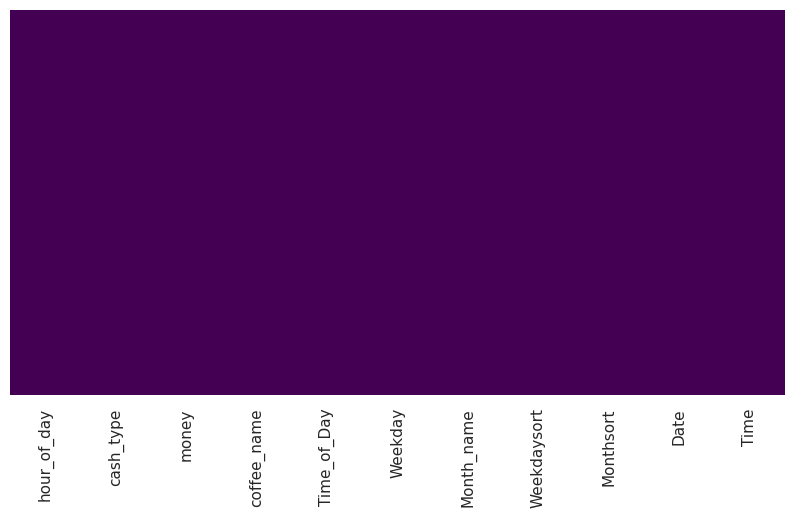

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")


4-Fill missing values (mean for numeric, mode for categorical)


 5- Exploratory Data Analysis (EDA)



5.1 Sales Distribution

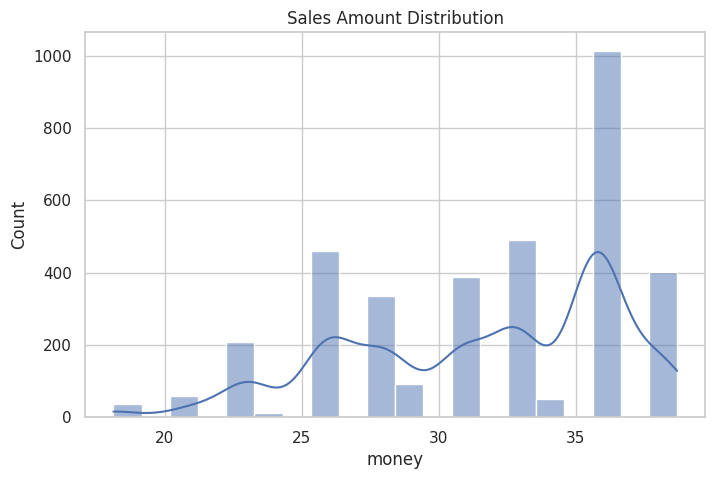

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["money"], bins=20, kde=True)
plt.title("Sales Amount Distribution")
plt.show()

5.2 Coffee Popularity

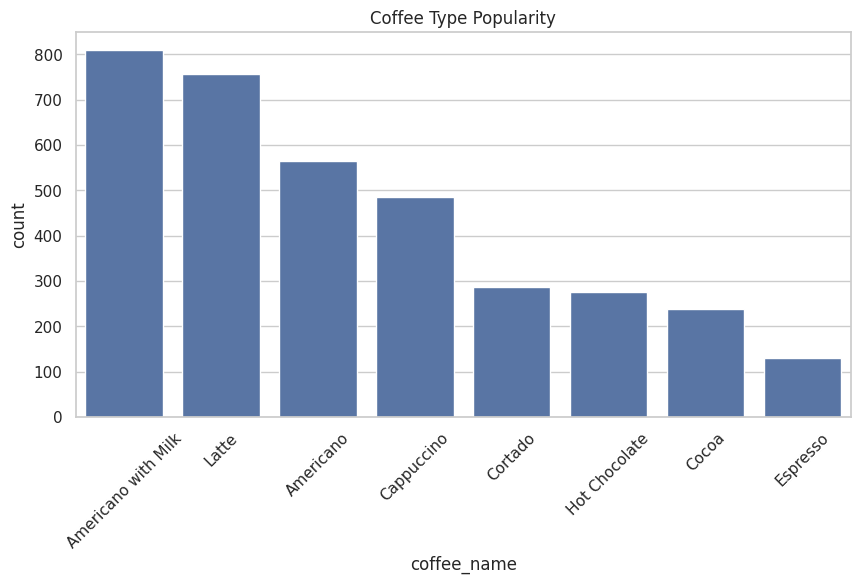

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="coffee_name", order=df["coffee_name"].value_counts().index)
plt.title("Coffee Type Popularity")
plt.xticks(rotation=45)
plt.show()

5.3 Average Sales by Coffee Type

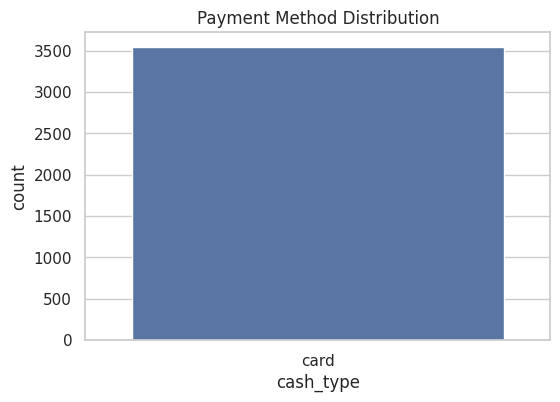

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="cash_type")
plt.title("Payment Method Distribution")
plt.show()

 5.4 Sales by time of day


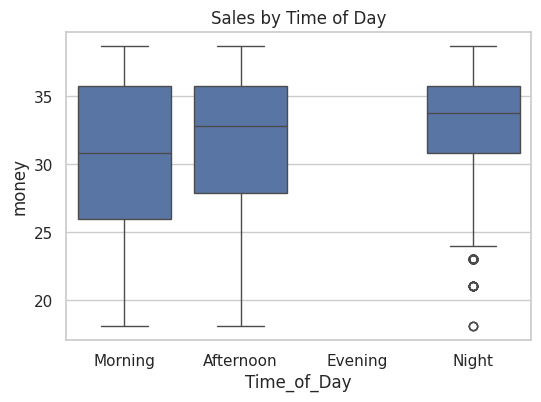

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Time_of_Day", y="money", order=["Morning","Afternoon","Evening","Night"])
plt.title("Sales by Time of Day")
plt.show()

5.5 Sales by weekday



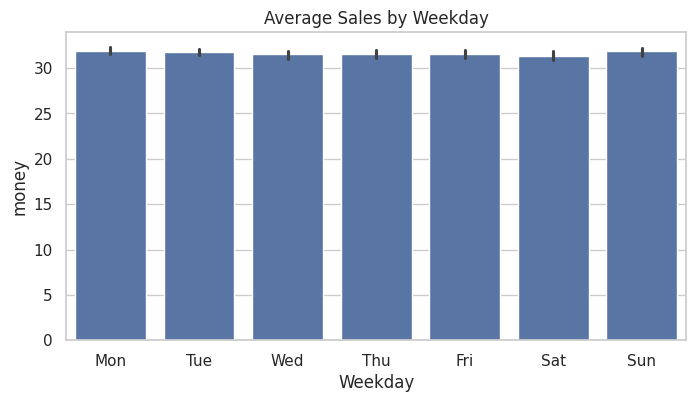

In [13]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x="Weekday", y="money", estimator=np.mean,
            order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.title("Average Sales by Weekday")
plt.show()

5.6 Sales by month

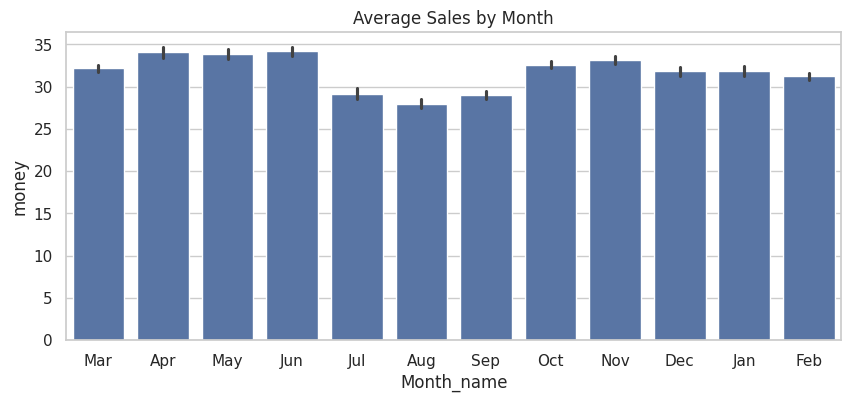

In [14]:
plt.figure(figsize=(10,4))
sns.barplot(data=df, x="Month_name", y="money", estimator=np.mean)
plt.title("Average Sales by Month")
plt.show()

5.7 Hourly Sales Trend

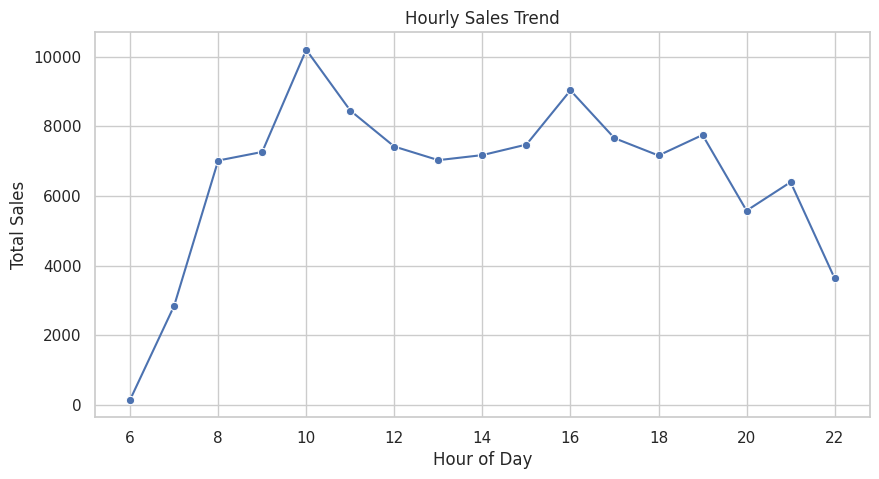

In [15]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("hour_of_day")["money"].sum().reset_index(),
             x="hour_of_day", y="money", marker="o")
plt.title("Hourly Sales Trend")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()


5.9 Top 5 Best selling Hours


Top 5 Best-Selling Hours:
 hour_of_day
10    10198.52
16     9031.84
11     8453.10
19     7751.96
17     7659.76
Name: money, dtype: float64


/tmp/ipython-input-3573277520.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hours.index, y=top_hours.values, palette="crest")


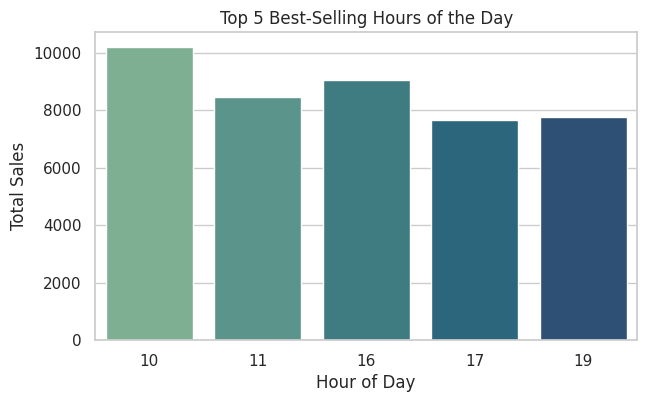

In [16]:

top_hours = df.groupby("hour_of_day")["money"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Best-Selling Hours:\n", top_hours)
plt.figure(figsize=(7,4))
sns.barplot(x=top_hours.index, y=top_hours.values, palette="crest")
plt.title("Top 5 Best-Selling Hours of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.show()

5.10 Top 5 Best-Selling Weekdays


Top 5 Best-Selling Weekdays:
 Weekday
Tue    18168.38
Mon    17363.10
Fri    16802.66
Thu    16091.40
Wed    15750.46
Name: money, dtype: float64


/tmp/ipython-input-224019274.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weekdays.index, y=top_weekdays.values, palette="flare")


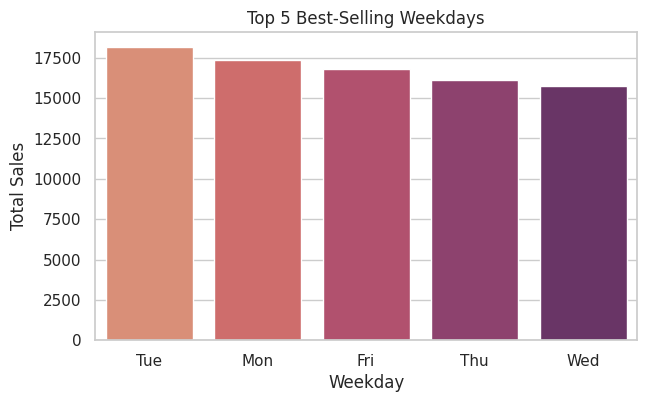

In [17]:
top_weekdays = df.groupby("Weekday")["money"].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Best-Selling Weekdays:\n", top_weekdays)

plt.figure(figsize=(7,4))
sns.barplot(x=top_weekdays.index, y=top_weekdays.values, palette="flare")
plt.title("Top 5 Best-Selling Weekdays")
plt.xlabel("Weekday")
plt.ylabel("Total Sales")
plt.show()

6- Key Insights Summary

6.1 Most popular coffee

In [20]:
most_popular_coffee = df['coffee_name'].value_counts().index[0]
print(f"Most Popular Coffee: {most_popular_coffee}")

Most Popular Coffee: Americano with Milk


6.2 Best hour of the day for sales

In [21]:
best_hour = top_hours.index[0]
print(f"Best hour of the day for sales: {best_hour}:00")

Best hour of the day for sales: 10:00


6.4 Best day for sales

In [23]:
best_day = top_weekdays.index[0]
print(f"Best day for sales: {best_day}")

Best day for sales: Tue


6.3 Best month for sales

In [22]:
best_month = df.groupby("Month_name")["money"].sum().sort_values(ascending=False).index[0]
print(f"Best month for sales: {best_month}")

Best month for sales: Mar


6.4 Best performers

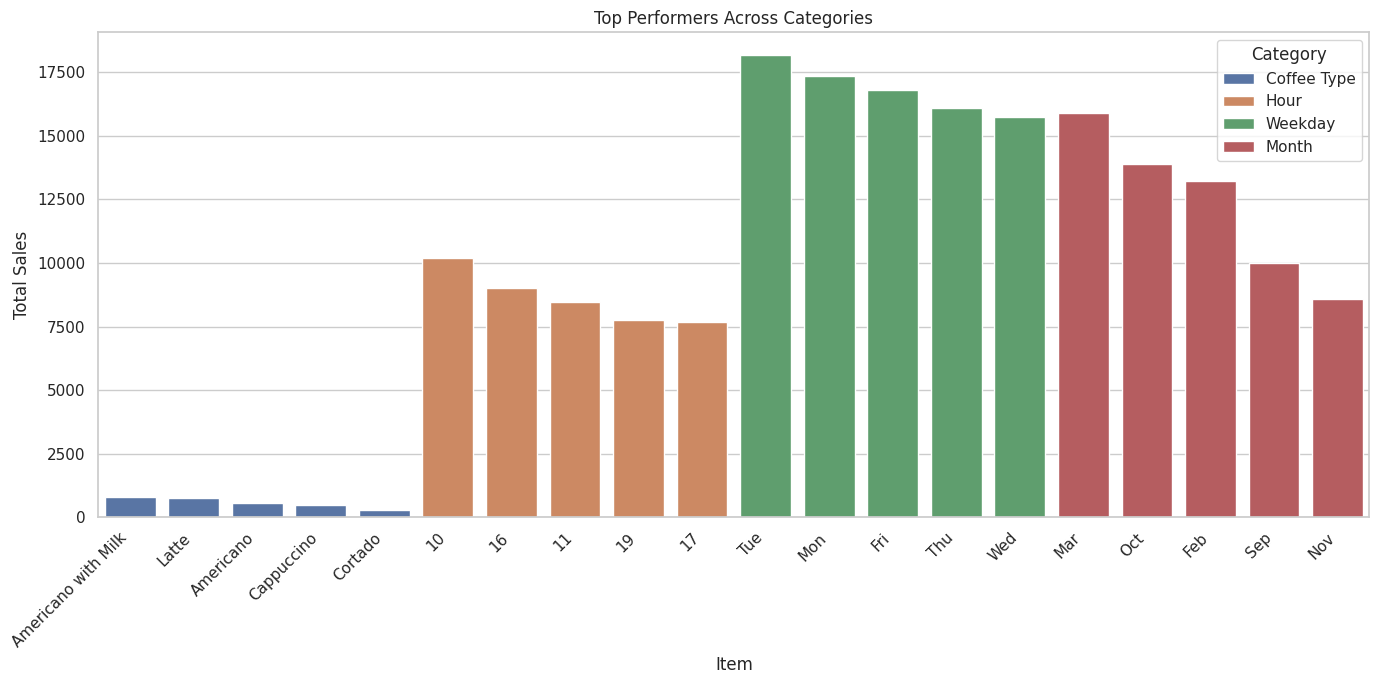

In [24]:
top_coffee = df['coffee_name'].value_counts().head(5)
top_hours_sales = df.groupby("hour_of_day")["money"].sum().sort_values(ascending=False).head(5)
top_weekdays_sales = df.groupby("Weekday")["money"].sum().sort_values(ascending=False).head(5)
top_months_sales = df.groupby("Month_name")["money"].sum().sort_values(ascending=False).head(5)

combined_data = pd.DataFrame({
    'Category': ['Coffee Type'] * len(top_coffee) + ['Hour'] * len(top_hours_sales) + ['Weekday'] * len(top_weekdays_sales) + ['Month'] * len(top_months_sales),
    'Item': top_coffee.index.tolist() + top_hours_sales.index.astype(str).tolist() + top_weekdays_sales.index.tolist() + top_months_sales.index.tolist(),
    'Sales': top_coffee.values.tolist() + top_hours_sales.values.tolist() + top_weekdays_sales.values.tolist() + top_months_sales.values.tolist()
})

plt.figure(figsize=(14, 7))
sns.barplot(data=combined_data, x='Item', y='Sales', hue='Category', dodge=False)
plt.title('Top Performers Across Categories')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Summary of Analysis

This notebook analyzes the provided coffee sales data to identify key trends and insights.

**1. Data Loading and Cleaning:**
*   The coffee sales dataset was loaded into a pandas DataFrame.
*   The shape of the dataset and the columns were inspected.
*   Duplicate rows were removed from the dataset.
*   Missing values were checked, and it was confirmed there were no missing values.

**2. Exploratory Data Analysis (EDA):**
*   The distribution of sales amounts was visualized using a histogram.
*   The popularity of different coffee types was analyzed and visualized using a count plot.
*   The distribution of payment methods was visualized using a count plot.
*   The sales trends across different times of the day (Morning, Afternoon, Evening, Night) were examined using a box plot.
*   The average sales for each weekday were calculated and visualized using a bar plot.
*   The average sales for each month were calculated and visualized using a bar plot.
*   The hourly sales trend was visualized using a line plot.
*   The top 5 best-selling hours and weekdays were identified and visualized using bar plots.

**3. Key Insights:**
*   The most popular coffee type is **Americano with Milk**.
*   The best hour of the day for sales is **10:00**.
*   The best month for sales is **Mar**.
*   The best day for sales is **Tue**.
*   A combined visualization was created to show the top performers across coffee types, hours, weekdays, and months, highlighting which categories contribute most to sales.